In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import math

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
#columns: city driver_count type
ride_data = pd.read_csv(ride_data_to_load)
#columns: city date fare ride_id

# Combine the data into a single dataset
#city_ride_df = pd.merge(city_data, ride_data, on='city', how='outer')
city_ride_df = pd.merge(ride_data, city_data, on=['city','city'], how='left')

# Display the data table for preview
city_ride_df.head()

#city_ride_df["type"].value_counts()
#Urban       1625
#Suburban     625
#Rural        125


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

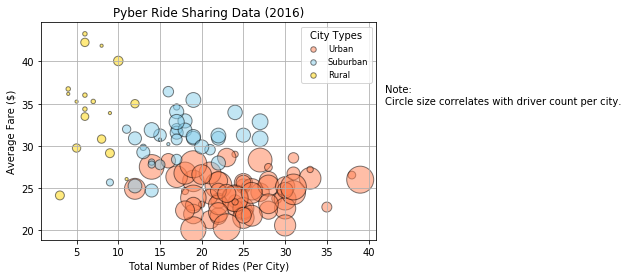

In [11]:
# Obtain the x and y coordinates for each of the three city types
urban_city_ride_df = city_ride_df[city_ride_df["type"]=="Urban"]
urban_city_ride_gb = urban_city_ride_df.groupby(["city"])

suburban_city_ride_df = city_ride_df[city_ride_df["type"]=="Suburban"]
suburban_city_ride_gb = suburban_city_ride_df.groupby(["city"])

rural_city_ride_df = city_ride_df[city_ride_df["type"]=="Rural"]
rural_city_ride_gb = rural_city_ride_df.groupby(["city"])

# Build the scatter plots for each city types
x_axis_u = urban_city_ride_gb["ride_id"].count()
data_u = urban_city_ride_gb["fare"].mean()
s_u = urban_city_ride_df["driver_count"]*10
plt.scatter(x_axis_u,data_u,marker='o',facecolors='Coral',edgecolors='black',s=s_u,alpha=.5,label="Urban")

x_axis_s = suburban_city_ride_gb["ride_id"].count()
data_s = suburban_city_ride_gb["fare"].mean()
s_s = suburban_city_ride_df["driver_count"]*10
plt.scatter(x_axis_s,data_s,marker='o',facecolors='SkyBlue',edgecolors='black',s=s_s,alpha=.5, label="Suburban")

x_axis_r = rural_city_ride_gb["ride_id"].count()
data_r = rural_city_ride_gb["fare"].mean()
s_r = rural_city_ride_df["driver_count"]*10
plt.scatter(x_axis_r,data_r,marker='o',facecolors='Gold',edgecolors='black',s=s_r,alpha=.5, label="Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)

# Create a legend
lgnd = plt.legend(title="City Types", fontsize="small", loc="best")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
textstr = "Note:\nCircle size correlates with driver count per city."
plt.text(42, 35, textstr, fontsize=10)

# Save Figure
plt.savefig("Pyber_ScatterPlot.png")

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

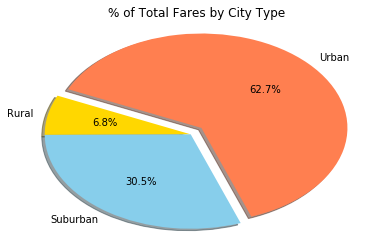

In [4]:
#Calculate Type Percents
urban_pct = urban_city_ride_df["fare"].sum()/city_ride_df["fare"].count() 
suburban_pct = suburban_city_ride_df["fare"].sum()/city_ride_df["fare"].count() 
rural_pct = rural_city_ride_df["fare"].sum()/city_ride_df["fare"].count()

#Build Pie Chart
labels = ["Urban","Rural","Suburban"]
sizes = [urban_pct,rural_pct,suburban_pct] 
colors = ["Coral","Gold","SkyBlue"]
explode = (.1,0,0)

plt.pie(sizes,explode=explode,labels=labels,colors=colors,shadow=True,startangle=290, autopct="%1.1f%%") 
plt.axis("auto")
plt.title("% of Total Fares by City Type")

#Save Figure
plt.savefig("Pyber_TFCT_Pie.png")

In [5]:
# Show Figure
plt.show()

## Total Rides by City Type

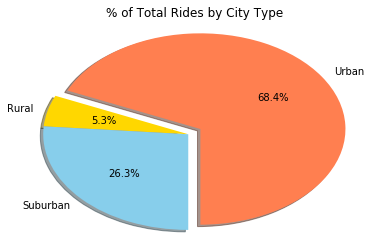

In [6]:
# Calculate Ride Percents
urban_ride_pct = urban_city_ride_df["ride_id"].count()/city_ride_df["ride_id"].count()
suburban_ride_pct = suburban_city_ride_df["ride_id"].count()/city_ride_df["ride_id"].count()
rural_ride_pct = rural_city_ride_df["ride_id"].count()/city_ride_df["ride_id"].count()

sizes = [urban_ride_pct,rural_ride_pct,suburban_ride_pct] 

# Build Pie Chart
plt.pie(sizes,explode=explode,labels=labels,colors=colors,shadow=True,startangle=270, autopct="%1.1f%%")
plt.axis("auto")
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Pyber_TRCT_Pie.png")

In [7]:
# Show Figure
plt.show()

## Total Drivers by City Type

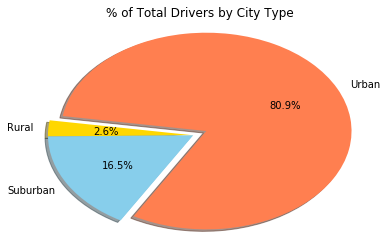

In [8]:
# Calculate Driver Percents
total_driver_count = city_data["driver_count"].sum()

urban_city_df = city_data[city_data["type"]=="Urban"]
urban_driver_count = urban_city_df["driver_count"].sum()
urban_driver_pct = (urban_driver_count/total_driver_count)

suburban_city_df = city_data[city_data["type"]=="Suburban"]
suburban_driver_count = suburban_city_df["driver_count"].sum()
suburban_driver_pct = (suburban_driver_count/total_driver_count)

rural_city_df = city_data[city_data["type"]=="Rural"]
rural_driver_count = rural_city_df["driver_count"].sum()
rural_driver_pct = (rural_driver_count/total_driver_count)

sizes = [urban_driver_pct,rural_driver_pct,suburban_driver_pct] 

# Build Pie Charts
plt.pie(sizes,explode=explode,labels=labels,colors=colors,shadow=True,startangle=240, autopct="%1.1f%%")
plt.axis("auto")
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Pyber_TDCT_Pie.png")

In [9]:
# Show Figure
plt.show()

In [ ]:
#three observable trends
#1) Urban fares tend to be lower
#2) There are more fares, more rides and more drivers in Urban areas, probably because there are more customers there
#3) Some Rural areas can be expensive comparitively, probably due to less customers and drivers
